In [1]:
#******************************************************MATPLOTLIB***************************************************************
# plt.show() command should be used only once per Python session, 

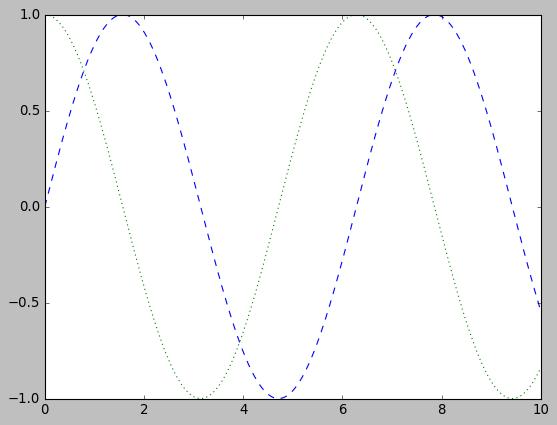

In [2]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('classic')

x=np.linspace(0,10,500)

fig=plt.figure()
plt.plot(x, np.sin(x), '--')
plt.plot(x, np.cos(x), ':')

# fig.savefig('test.png')

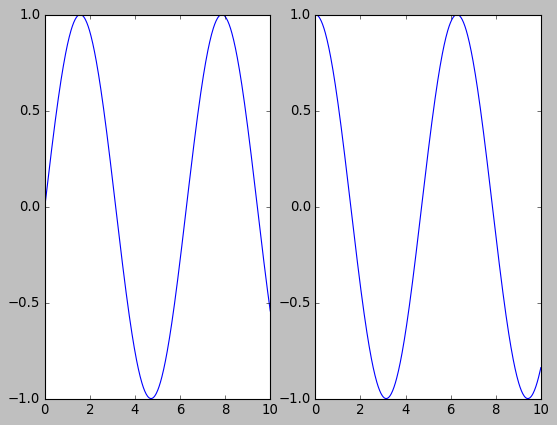

In [3]:
plt.subplot(1,2,1) # 1=row, 2=column, 1=axes number(panel number)
plt.plot(x, np.sin(x))

plt.subplot(1,2,2) # 1=row, 2=column, 2=axes number(panel number)
plt.plot(x, np.cos(x))

- plt.gcf() - get current figure
- plt.gca() - get current axes

- figure (an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. 
- axes (an instance of the class plt.Axes) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.

- fig = figure instance
- ax = axes instance or group of axes instances

- plt.xlabel() → ax.set_xlabel()
- plt.ylabel() → ax.set_ylabel() 
- plt.xlim() → ax.set_xlim()
- plt.ylim() → ax.set_ylim()
- plt.title() → ax.set_title()

- or ax.set( xlim, ylim, xlabel, ylabel, title )


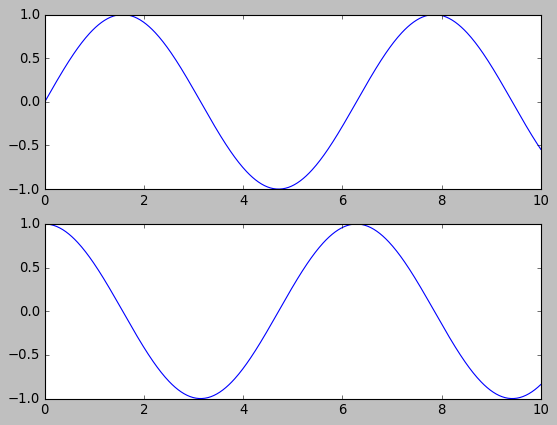

In [4]:
# Object-oriented interface
# the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects

# create a grid of plots:
fig, ax =plt.subplots(2) # ax is an array of two Axes objects

# call plot() method on appropriate object:
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))


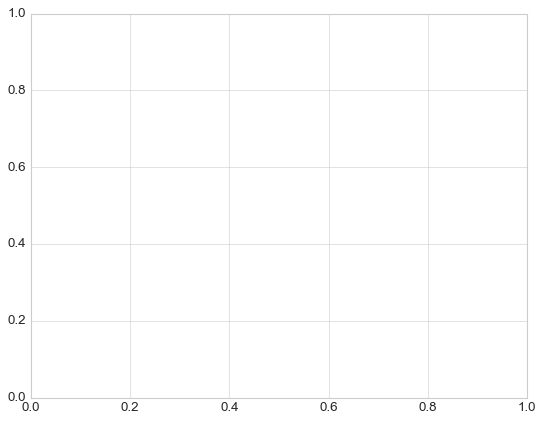

In [5]:
plt.style.use('seaborn-whitegrid')

fig=plt.figure()
ax=plt.axes() # empty grid

(-1.0, 12.0)

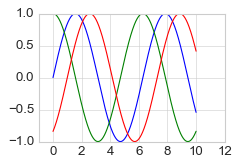

In [6]:
fig=plt.figure(figsize=(3,2))
ax=plt.axes()

x=np.linspace(0,10, 1000)
ax.plot(x, np.sin(x)) # creating multiple lines on one figure: 
ax.plot(x, np.cos(x))
ax.plot(x, np.sin(x-1))
plt.xlim(-1, 12)

(-1.0, 12.0, -2.0, 20.0)

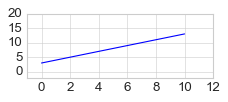

In [7]:
plt.figure(figsize=(3,1))
plt.plot(x, x+3)

#setting axis limits:
plt.xlim(-1, 12)
plt.ylim(-2, 20)

# or by using axis() method [xmin, xmax, ymin, ymax]:
plt.axis([-1, 12, -2, 20])

(10.0, 0.0)

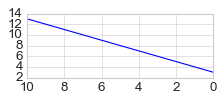

In [8]:
#reverse axis order:
plt.figure(figsize=(3,1))
plt.plot(x, x+3)
plt.xlim(10,0)

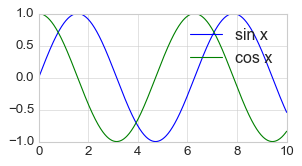

In [9]:
# LABELING PLOTS:
# plot legend that labels each line type:
plt.figure(figsize=(4,2))
plt.plot(x, np.sin(x), label='sin x')
plt.plot(x, np.cos(x), label='cos x')
plt.legend()

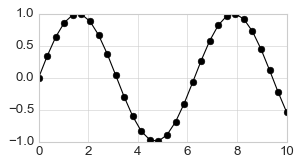

In [10]:
# MARKER: markersize, markerfacecolor, markeredgecolor, markeredgewidth
x=np.linspace(0,10,30)

plt.figure(figsize=(4,2))
plt.plot(x, np.sin(x), marker='o', color='black')

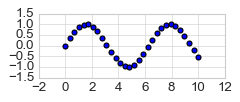

In [11]:
plt.figure(figsize=(3,1))
plt.scatter(x, np.sin(x))

In [12]:
# plt.plot vs plt.scatter: 
# - in the scatter plot the properties of each individual point (size, face color, edge color, etc.) can be 
#individually controlled or mapped to data
# - plt.plot is more efficient : plt.scatter has the capability to render a different size and/or color for each point, 
# so the renderer must do the extra work of constructing each point individually


# - the marker size: plt.plot->markersize=22 = plt.scatter->s=22**2 (in plt.scatter smaller scale, hence feature raised to power or multiplication)

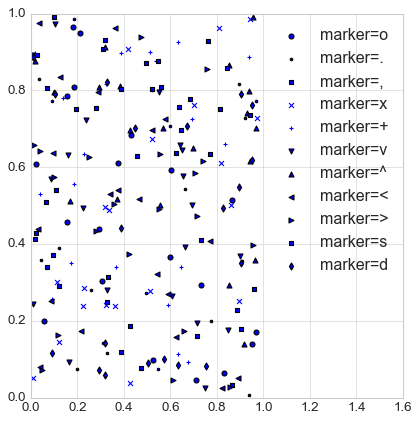

In [13]:
plt.figure(figsize=(6,6))
rng=np.random.RandomState(42)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.scatter(rng.rand(20), rng.rand(20), marker=marker, label='marker={}'.format(marker))
    plt.axis([0, 1.6, 0, 1])
    plt.legend()

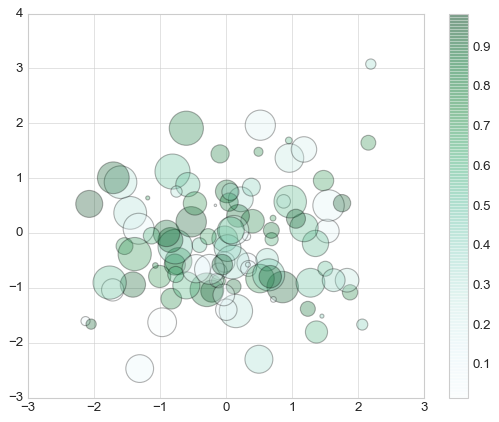

In [14]:
# rand - only positive, randn - positive & negative, first argument - the number of items
plt.scatter(x=rng.randn(100), y=rng.randn(100), c=rng.rand(100), s=rng.rand(100)*1000, cmap='BuGn', alpha=0.3)
plt.colorbar() #show color scale

In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# np.c_ = numpy concatenate
iris=load_iris()
iris=pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names+['species'])
target_names=['setosa', 'versicolor', 'virginica']
iris['names']=iris['species'].replace({i:target_names[i] for i in range(len(target_names))})
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


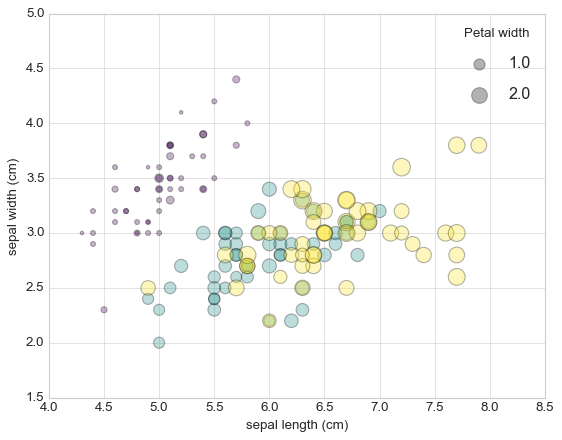

In [16]:
iris2=load_iris()
features=iris2.data.T # Transpose =  reshaping from 150 rows and 4 columns to 4 rows and 150 columns (sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm))
features.shape

plt.scatter(x=features[0], y=features[1], s=100*features[3], c=iris2.target, cmap='viridis', alpha=0.3)
plt.xlabel(iris2.feature_names[0])
plt.ylabel(iris2.feature_names[1])

# adding legend:

for area in np.delete(np.unique(np.around(features[3])),0):
    plt.scatter([], [], c='k', alpha=0.3, s=area*100,
    label=str(area))

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Petal width')

In [17]:
np.around(np.unique(features[3]))
np.unique(np.around(features[3]))

array([0., 1., 2.])

(array([ 10.,  21.,  82., 177., 227., 241., 134.,  76.,  28.,   4.]),
 array([-2.92135048, -2.30990468, -1.69845887, -1.08701307, -0.47556726,
         0.13587854,  0.74732435,  1.35877015,  1.97021596,  2.58166176,
         3.19310757]),
 <BarContainer object of 10 artists>)

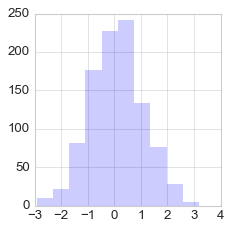

In [18]:
#*******************************************HISTOGRAM:
x=rng.randn(1000)
plt.figure(figsize=(3,3))
plt.hist(x, alpha=0.2, edgecolor='none')

In [19]:
# count the number of points in a given bin:
counts, bin_edges = np.histogram(x, bins=5)
counts

array([ 31, 259, 468, 210,  32], dtype=int64)

In [20]:
from sklearn.datasets import load_digits
digits=load_digits(n_class=6)

iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


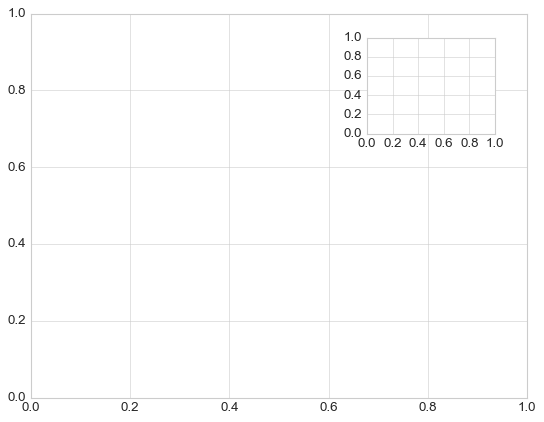

In [21]:
#**********************************************SUBPLOTS:
# plt.axes([bottom, left, width, height]) function:
plt.axes()
plt.axes([0.65, 0.65, 0.2, 0.2])

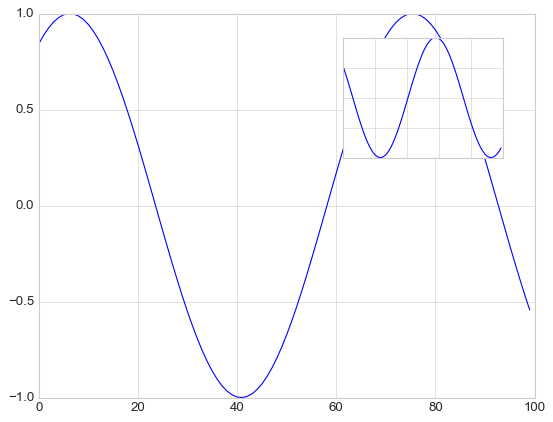

In [22]:
x=np.linspace(1,10, 100)

fig=plt.figure()
ax1=fig.add_subplot()
ax2=fig.add_axes([0.6, 0.6, 0.25, 0.25], xticklabels=[], yticklabels=[])

ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

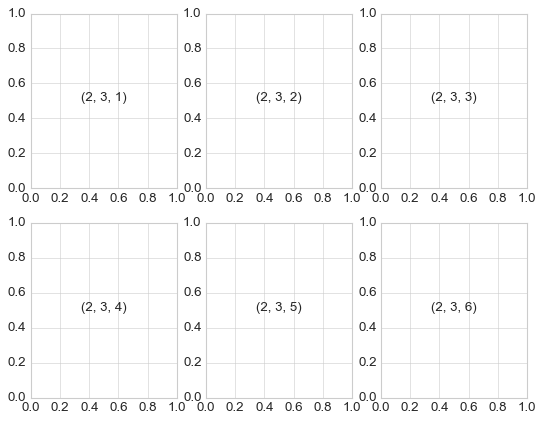

In [23]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5, 0.5, str((2,3, i)), ha='center')

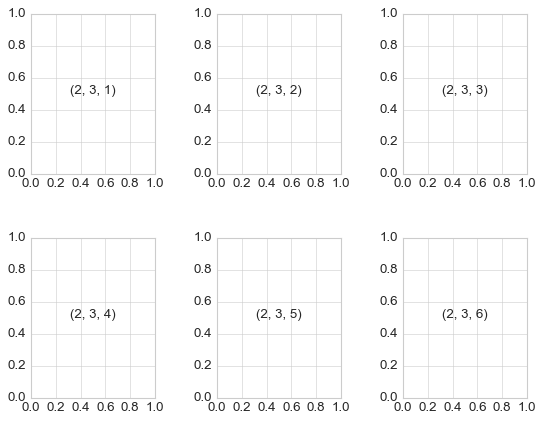

In [24]:
fig=plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.5)
for i in range(1,7):
    ax=fig.add_subplot(2,3,i)
    ax.text(0.5, 0.5, str((2,3,i)), ha='center')

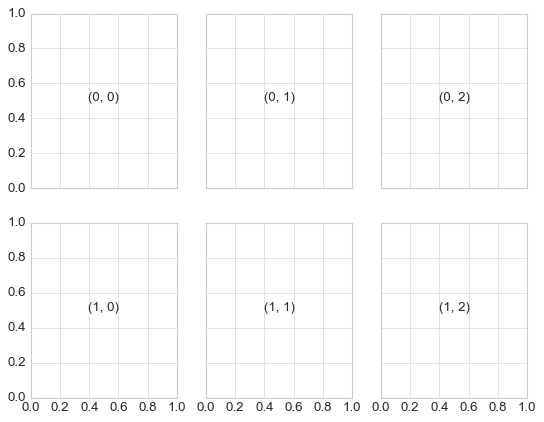

In [25]:
fig, ax =plt.subplots(2,3, sharex=True, sharey=True)
for row in range(2):
    for col in range(3):
        ax[row][col].text(0.5, 0.5, str((row, col)), ha='center')

<AxesSubplot:>

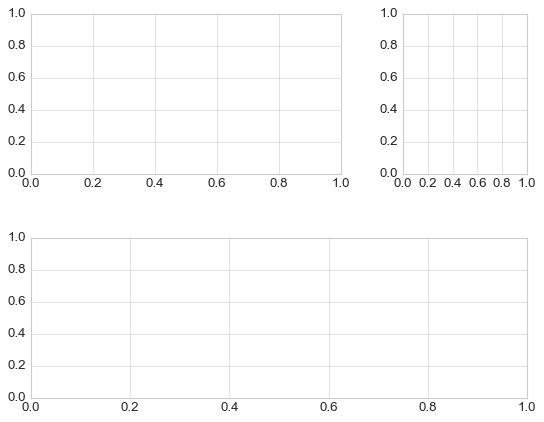

In [26]:
# plt.GidSpec() - span multiple rows and columns
grid=plt.GridSpec(2,3, wspace=0.5, hspace=0.4) # a grid of 2 rows and three columns

x=np.linspace(10, 100)

plt.subplot(grid[0, :2])
plt.subplot(grid[0, 2])
plt.subplot(grid[1,:])

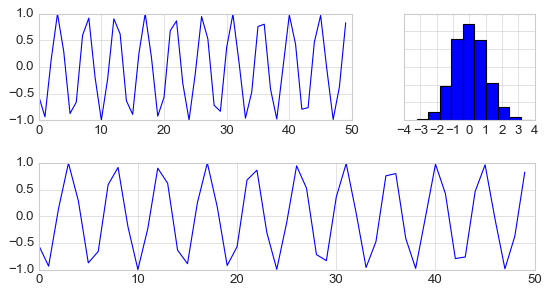

In [27]:
rng=np.random.RandomState(42)

x=np.linspace(10,1000)
y=rng.randn(1000)

fig=plt.figure(figsize=(8,4))
grid=plt.GridSpec(2,3, wspace=0.4, hspace=0.4)

ax1=fig.add_subplot(grid[0, :2])
ax2=fig.add_subplot(grid[0,2],yticklabels=[])
ax3= fig.add_subplot(grid[1,:])

ax1.plot(np.sin(x))
ax2.hist(y)
ax3.plot(np.sin(x))

In [28]:
df=pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/births.csv')
df.info()
df.isna().sum()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [29]:
df.isna().sum()
df['day']=df['day'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15067 entries, 0 to 15066
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    15067 non-null  int64 
 1   month   15067 non-null  int64 
 2   day     15067 non-null  int32 
 3   gender  15067 non-null  object
 4   births  15067 non-null  int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 647.4+ KB


In [30]:
df.index=pd.to_datetime(10000 * df.year + 100 * df.month + df.day, format='%Y%m%d', errors='coerce') #errors will be replaced with NaN
df.dropna(inplace=True)

In [31]:
df.head()
# df['year'].max()


,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548


<AxesSubplot:>

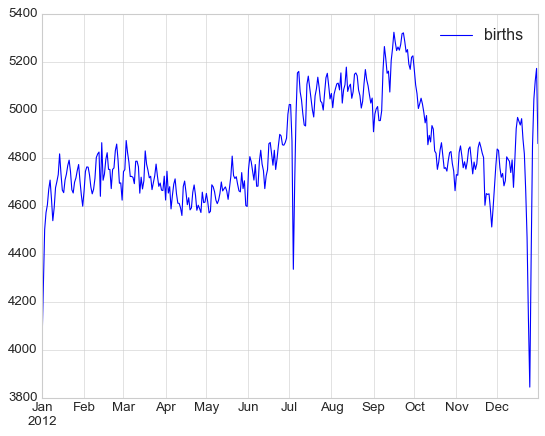

In [33]:
import datetime

df_pivot=df.pivot_table('births', index=[df.index.month, df.index.day]) # = multiindex

df_pivot.index
df_pivot.index=[datetime.datetime(2012 , int(month), int(day)) for (month, day) in df_pivot.index]
df_pivot.plot()

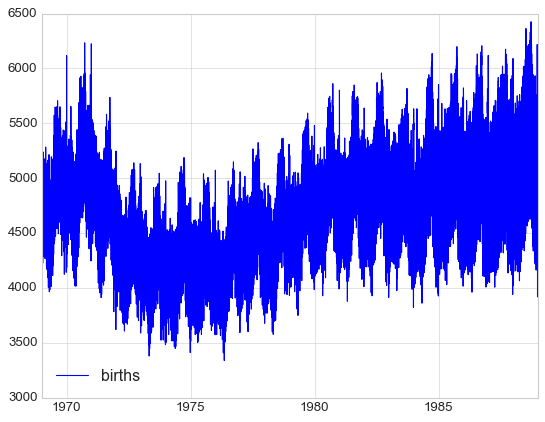

In [34]:
df_pivot2=df.pivot_table('births', index=[df.index.year, df.index.month, df.index.day])
df_pivot2.index=[datetime.datetime(int(year), int(month),int(day)) for (year, month, day) in df_pivot2.index]


df_pivot2.plot()

def wykres(dane, year):
    df=dane
    df[df.index.year==year].plot()
    

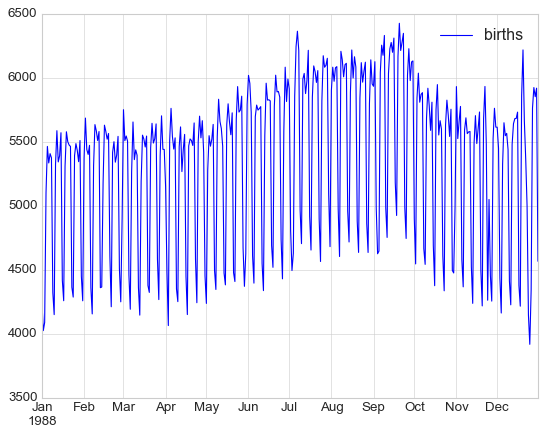

In [35]:
wykres(df_pivot2, 1988)

Text(1976-05-31, 4070.2903225806454, 'Minimum value - 1976-05-31')

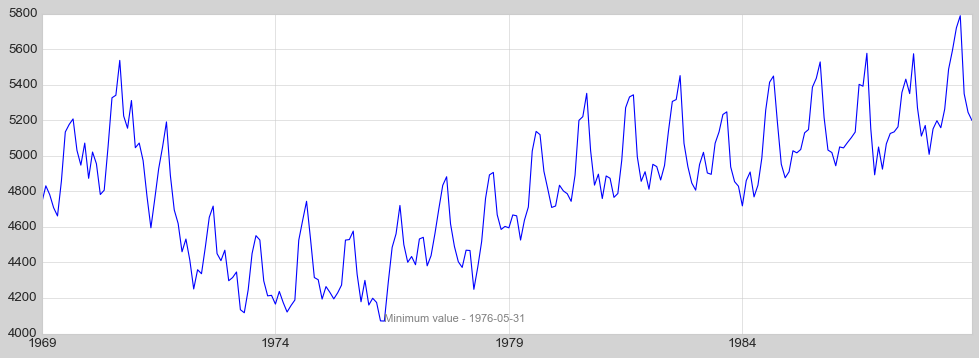

In [36]:
df2=df.resample('M').mean()
minvaldate=df2.births.idxmin().strftime("%Y-%m-%d")

style = dict(size=10, color='gray', va='baseline')

fig, ax=plt.subplots(figsize=(15,5), facecolor='lightgray')

df2.births.plot(ax=ax)
ax.text(minvaldate, df2.births.min(), f"Minimum value - {minvaldate}", **style)



(-2.5, 1.5)

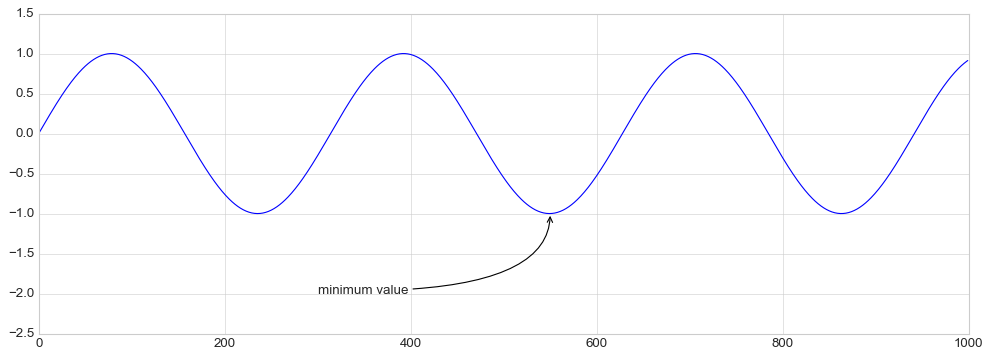

In [37]:
x=np.linspace(0, 20, 1000)


fig, ax=plt.subplots(figsize=(15,5))
ax.plot(np.sin(x))
ax.annotate('minimum value', xy=(550,-1), xytext=(300,-2), arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax.set_ylim(-2.5,1.5)

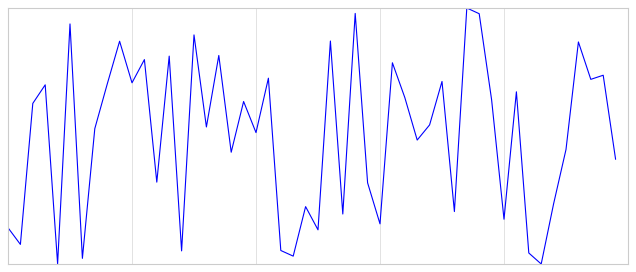

In [38]:
# HIDING TICKS / LABELS:
fig,ax =plt.subplots(figsize=(10,4))
ax.plot(rng.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

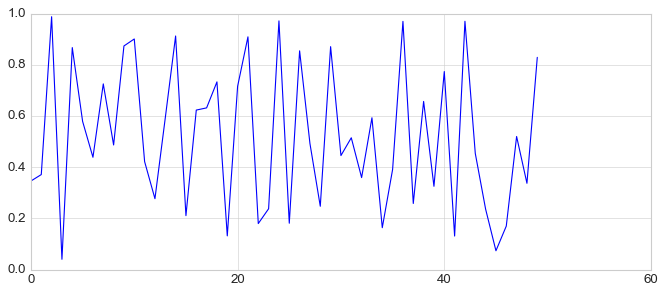

In [39]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(rng.rand(50))
ax.xaxis.set_major_locator(plt.MaxNLocator(3)) # it specifies the maximum number of ticks that will be displayed

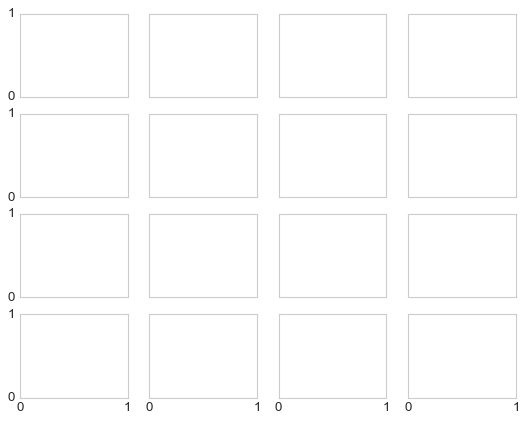

In [40]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(1))
    axi.yaxis.set_major_locator(plt.MaxNLocator(1))


In [41]:
# plt.rcParams - allows to customize the styles of graphs plt.rc()
# styles already created:
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

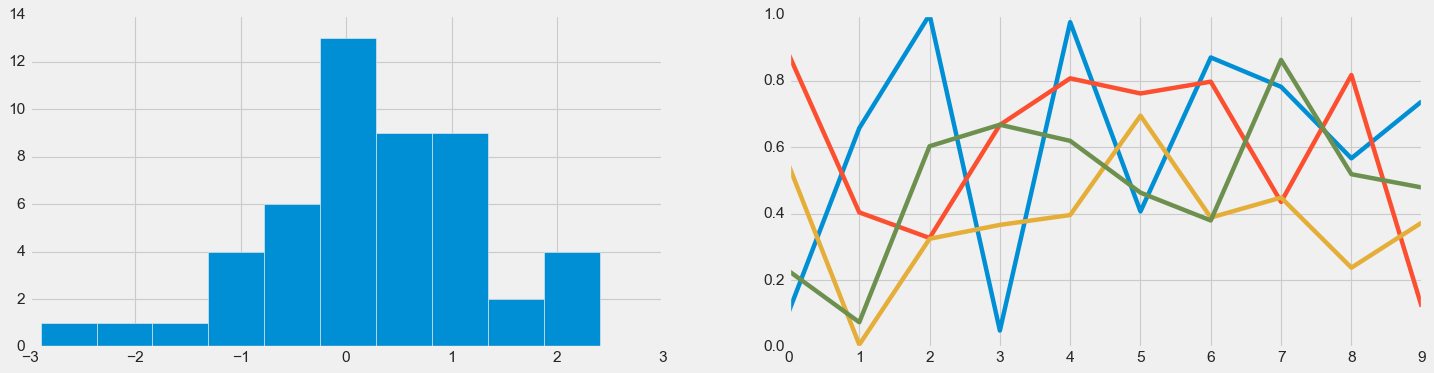

In [42]:
# change styles  - for the rest of the session:
# plt.style.use('stylename')


# change styles temporarily:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1,2, figsize=(20,5))
    ax[0].hist(rng.randn(50))
    for i in range(4):
        ax[1].plot(rng.rand(10))

<Axes3DSubplot:>

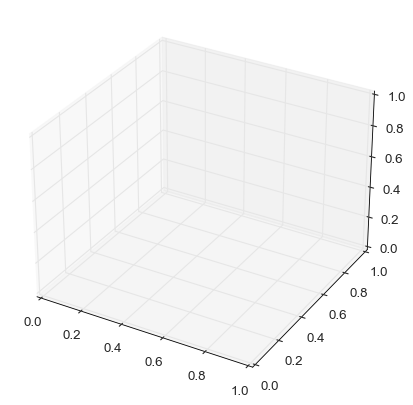

In [43]:
#**********************************************3D PLOTTING:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


# an empty 3d axes:
plt.axes(projection='3d')

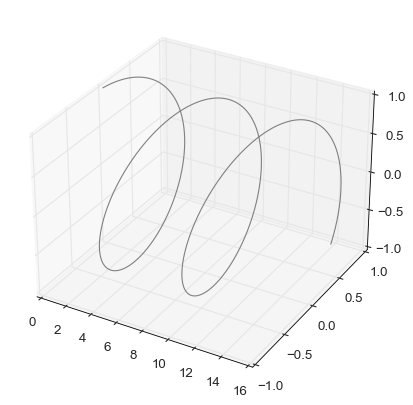

In [44]:
xline=np.linspace(0,15,1000)
yline=np.sin(xline)
zline=np.cos(xline)

ax=plt.axes(projection='3d')
ax.plot3D(xline, yline, zline, 'gray')

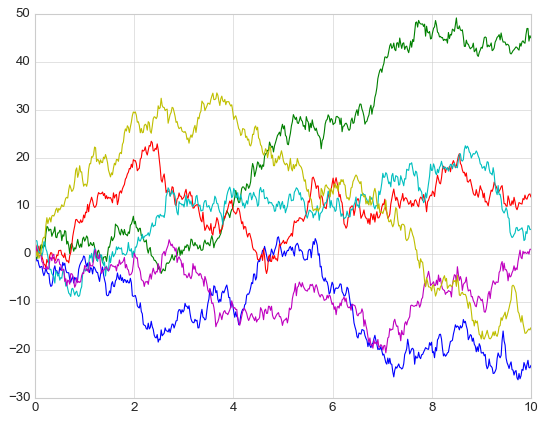

In [45]:
x=np.linspace(0,10,500)
y=np.cumsum(rng.randn(500,6),0)
plt.plot(x,y)

<AxesSubplot:ylabel='Density'>

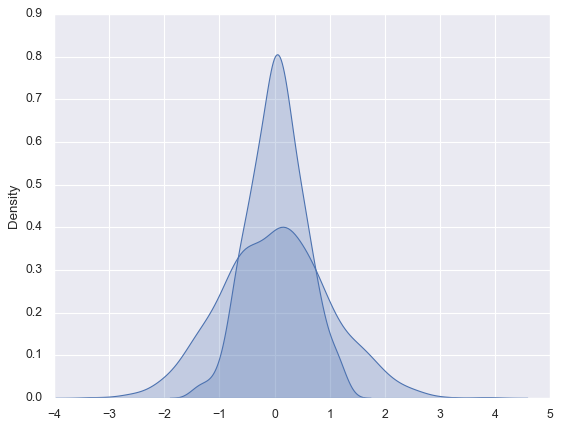

In [151]:
#*********************************************SEABORN:
import seaborn as sns
sns.set()

rng=np.random.RandomState(42)

x= rng.randn(1000)
y=rng.randn(400)/2

sns.kdeplot(x, shade=True)
sns.kdeplot(y, shade=True)

Text(-3.5, 70, 'line')

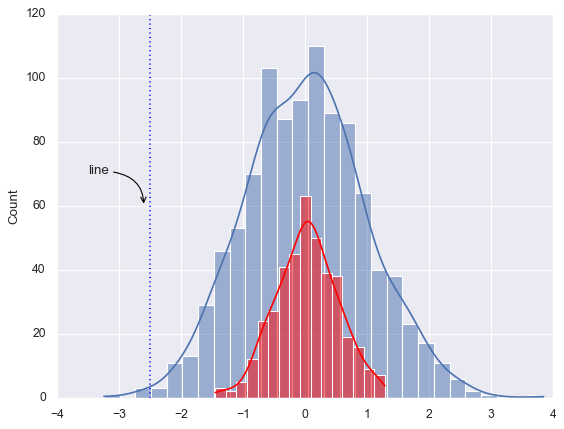

In [162]:
sns.histplot(x, kde=True)
sns.histplot(y, kde=True, color='red')
plt.axvline(-2.5, color='blue', linestyle=':')
plt.annotate('line', xy=(-2.6,60), xytext=(-3.5,70), arrowprops=dict(arrowstyle="->",color='black', connectionstyle="angle3,angleA=0,angleB=-90"))

In [48]:
xs=pd.Series(x)
ys=pd.Series(y)
dfsns=pd.concat([xs,ys], axis=1)
dfsns.columns=['x','y']
dfsns.fillna(0, inplace=True)
dfsns.head()

,x,y
0,0.496714,0.699678
1,-0.138264,0.462317
2,0.647689,0.029815
3,1.523030,-0.323468
4,-0.234153,0.349112


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


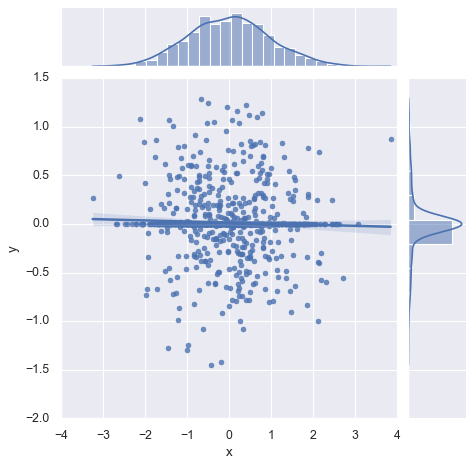

In [49]:
sns.jointplot(dfsns.x, dfsns.y, dfsns, kind='reg')

In [109]:
rng=np.random.RandomState(42)

s=np.arange('2005-02', '2005-03', dtype='datetime64[s]')
s=pd.to_datetime(s)
s=s.strftime('%H:%M:%S')[::3]
s=s[:1000]


df=pd.DataFrame({#'A': (pd.timedelta_range(0, periods=1000, freq='T')),
                'A':s,
                'B': rng.randint(20,50,1000),
                'C': rng.choice(['M', 'K'], size=1000)})

df.columns=['start', 'age', 'gender']

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   start   1000 non-null   object
 1   age     1000 non-null   int32 
 2   gender  1000 non-null   object
dtypes: int32(1), object(2)
memory usage: 19.7+ KB


,start,age,gender
0,00:00:00,26,M
1,00:00:03,39,M
2,00:00:06,48,K
3,00:00:09,34,M
4,00:00:12,30,K
...,...,...,...
995,00:49:45,40,M
996,00:49:48,24,M
997,00:49:51,29,M
998,00:49:54,29,K


In [137]:
df2=pd.concat([df, pd.DataFrame(df.start.str.split(':').to_list())], axis=1)
df2

,start,age,gender,0,1,2
0,00:00:00,26,M,00,00,00
1,00:00:03,39,M,00,00,03
2,00:00:06,48,K,00,00,06
3,00:00:09,34,M,00,00,09
4,00:00:12,30,K,00,00,12
...,...,...,...,...,...,...
995,00:49:45,40,M,00,49,45
996,00:49:48,24,M,00,49,48
997,00:49:51,29,M,00,49,51
998,00:49:54,29,K,00,49,54


In [170]:
df2.rename(columns={0: 'H', 1:'M', 2:'S'}, inplace=True)
df2['agedec']=(df2.age//10)*10
df2.head()

,start,age,gender,H,M,S,agedec
0,00:00:00,26,M,00,00,00,20
1,00:00:03,39,M,00,00,03,30
2,00:00:06,48,K,00,00,06,40
3,00:00:09,34,M,00,00,09,30
4,00:00:12,30,K,00,00,12,30


In [192]:
# pd.cut(df2['S'], 5)
df2.S=df2.S.astype(int)
type(df2.S[0])
df2['bins']=pd.cut(df2['S'], bins=[1, 20, 40, 60])
df2.head()

,start,age,gender,H,M,S,agedec,bins
0,00:00:00,26,M,00,00,0,20,NaN
1,00:00:03,39,M,00,00,3,30,"(1.0, 20.0]"
2,00:00:06,48,K,00,00,6,40,"(1.0, 20.0]"
3,00:00:09,34,M,00,00,9,30,"(1.0, 20.0]"
4,00:00:12,30,K,00,00,12,30,"(1.0, 20.0]"


In [187]:
df2['bins'].unique()

[NaN, (1.0, 20.0], (20.0, 40.0], (40.0, 60.0]]
Categories (3, interval[int64]): [(1, 20] < (20, 40] < (40, 60]]

<AxesSubplot:xlabel='bins', ylabel='agedec'>

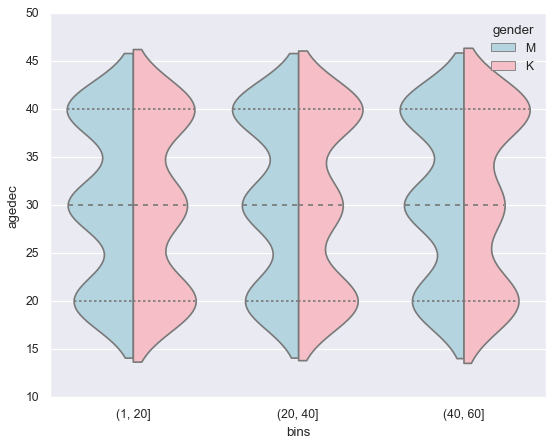

In [185]:
sns.violinplot(y="agedec", x="bins", hue="gender", data=df2, split=True, inner="quartile", palette=["lightblue", "lightpink"])